In [87]:
import requests
import json
from config import api_key
from pprint import pprint
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [88]:
cityidlist = []
idlimit = 0
with open('city.list.json', 'r', encoding='utf8') as ct:
    ct_dict = json.load(ct)
for x in ct_dict:
    cityidlist.append(x['id'])
    idlimit += 1
    if idlimit == 1000:
        break
print(len(cityidlist))

1000


In [89]:
# api.openweathermap.org/data/2.5/weather?id={city id}&appid={your api key}
url = 'http://api.openweathermap.org/data/2.5/weather?'
response_list = []
unit = 'Imperial'
for x in cityidlist:
    base_url = url + "id=" + str(x) + "&appid=" + api_key + "&units=" + unit
    response = requests.get(base_url).json()
    response_list.append(response)
pprint(response_list)

[{'base': 'stations',
  'clouds': {'all': 97},
  'cod': 200,
  'coord': {'lat': 44.55, 'lon': 34.28},
  'dt': 1592437858,
  'id': 707860,
  'main': {'feels_like': 68.34,
           'grnd_level': 993,
           'humidity': 62,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 70.84,
           'temp_max': 70.84,
           'temp_min': 70.84},
  'name': 'Gurzuf',
  'sys': {'country': 'UA', 'sunrise': 1592445450, 'sunset': 1592501439},
  'timezone': 10800,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 11, 'speed': 8.46}},
 {'base': 'stations',
  'clouds': {'all': 64},
  'cod': 200,
  'coord': {'lat': 55.68, 'lon': 37.67},
  'dt': 1592437858,
  'id': 519188,
  'main': {'feels_like': 72.25,
           'humidity': 100,
           'pressure': 1017,
           'temp': 68.13,
           'temp_max': 72,
           'temp_min': 60.8},
  'name': 'Novinki',
  '

  'dt': 1592437862,
  'id': 745042,
  'main': {'feels_like': 73.08,
           'humidity': 83,
           'pressure': 1007,
           'temp': 69.01,
           'temp_max': 71.6,
           'temp_min': 66},
  'name': 'Istanbul',
  'sys': {'country': 'TR',
          'id': 6970,
          'sunrise': 1592447490,
          'sunset': 1592501944,
          'type': 1},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 1.12}},
 {'base': 'stations',
  'clouds': {'all': 87},
  'cod': 200,
  'coord': {'lat': 19.55, 'lon': -71.08},
  'dt': 1592437862,
  'id': 3496831,
  'main': {'feels_like': 92.25,
           'humidity': 71,
           'pressure': 1014,
           'temp': 84.99,
           'temp_max': 84.99,
           'temp_min': 84.99},
  'name': 'Mao',
  'sys': {'country': 'DO',
          'id': 2006494,
          'sunrise': 1592388368,
 

          'sunset': 1592440364,
          'type': 1},
  'timezone': -14400,
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 120, 'speed': 6.93}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 31.39, 'lon': -110.29},
  'dt': 1592437864,
  'id': 5285039,
  'main': {'feels_like': 73.71,
           'humidity': 10,
           'pressure': 1018,
           'temp': 86.77,
           'temp_max': 89.6,
           'temp_min': 82},
  'name': 'Black Bear Spring',
  'sys': {'country': 'US',
          'id': 4096,
          'sunrise': 1592396195,
          'sunset': 1592447273,
          'type': 1},
  'timezone': -25200,
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 240, 'gust': 21.92, 'speed': 14.99}},
 {'base': 'stati

          'type': 1},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 60, 'speed': 4.47}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 34.04, 'lon': -94.11},
  'dt': 1592437867,
  'id': 4047656,
  'main': {'feels_like': 86.94,
           'humidity': 48,
           'pressure': 1015,
           'temp': 86.9,
           'temp_max': 87.8,
           'temp_min': 86},
  'name': 'Provo',
  'sys': {'country': 'US',
          'id': 3804,
          'sunrise': 1592391896,
          'sunset': 1592443804,
          'type': 1},
  'timezone': -18000,
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 120, 'speed': 9.17}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'la

  'timezone': 3600,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 78, 'speed': 5.03}},
 {'base': 'stations',
  'clouds': {'all': 98},
  'cod': 200,
  'coord': {'lat': 53.64, 'lon': -1.86},
  'dt': 1592437870,
  'id': 2648355,
  'main': {'feels_like': 57.9,
           'humidity': 99,
           'pressure': 1014,
           'temp': 56.93,
           'temp_max': 57.99,
           'temp_min': 55.99},
  'name': 'Golcar',
  'sys': {'country': 'GB',
          'id': 2009191,
          'sunrise': 1592451413,
          'sunset': 1592512825,
          'type': 3},
  'timezone': 3600,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 68, 'gust': 7, 'speed': 1.99}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 52.23, 'lon': -2.55},
  'dt': 1592437870,
  '

           'temp_min': 62.67},
  'name': 'Watsa',
  'rain': {'1h': 0.22},
  'sys': {'country': 'CD', 'sunrise': 1592452448, 'sunset': 1592496716},
  'timezone': 7200,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 173, 'speed': 1.14}},
 {'base': 'stations',
  'clouds': {'all': 84},
  'cod': 200,
  'coord': {'lat': 2.15, 'lon': 27.99},
  'dt': 1592437873,
  'id': 204318,
  'main': {'feels_like': 71.74,
           'grnd_level': 925,
           'humidity': 92,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 67.42,
           'temp_max': 67.42,
           'temp_min': 67.42},
  'name': 'Wamba',
  'rain': {'1h': 0.21},
  'sys': {'country': 'CD', 'sunrise': 1592452913, 'sunset': 1592496995},
  'timezone': 7200,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 2

  'sys': {'country': 'DE',
          'id': 1306,
          'sunrise': 1592449860,
          'sunset': 1592509780,
          'type': 1},
  'timezone': 7200,
  'visibility': 4500,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 60, 'speed': 3.36}},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': 52.33, 'lon': 8.77},
  'dt': 1592437875,
  'id': 6553128,
  'main': {'feels_like': 70.45,
           'humidity': 82,
           'pressure': 1009,
           'temp': 67.68,
           'temp_max': 68,
           'temp_min': 66.99},
  'name': 'Hille',
  'sys': {'country': 'DE',
          'id': 1820,
          'sunrise': 1592449346,
          'sunset': 1592509790,
          'type': 1},
  'timezone': 7200,
  'visibility': 6000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'

  'name': 'Utebo',
  'sys': {'country': 'ES',
          'id': 6439,
          'sunrise': 1592454545,
          'sunset': 1592509281,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 290, 'speed': 8.05}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 41.52, 'lon': 2.13},
  'dt': 1592437878,
  'id': 6356273,
  'main': {'feels_like': 67.59,
           'humidity': 88,
           'pressure': 1017,
           'temp': 64.58,
           'temp_max': 68,
           'temp_min': 62.01},
  'name': 'Barberà del Vallès',
  'sys': {'country': 'ES',
          'id': 6414,
          'sunrise': 1592453835,
          'sunset': 1592508488,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,


          'sunrise': 1592452041,
          'sunset': 1592510162,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 210, 'speed': 4.7}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 48.73, 'lon': 2.42},
  'dt': 1592437881,
  'id': 6452039,
  'main': {'feels_like': 57.7,
           'humidity': 82,
           'pressure': 1012,
           'temp': 59.2,
           'temp_max': 62.01,
           'temp_min': 57.2},
  'name': 'Villeneuve-le-Roi',
  'sys': {'country': 'FR',
          'id': 6548,
          'sunrise': 1592452014,
          'sunset': 1592510170,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 210, 'speed': 4.7}},
 {'base

  'id': 6446146,
  'main': {'feels_like': 57.11,
           'humidity': 82,
           'pressure': 1012,
           'temp': 58.75,
           'temp_max': 60.8,
           'temp_min': 57.2},
  'name': 'Grigny',
  'sys': {'country': 'FR',
          'id': 6548,
          'sunrise': 1592452044,
          'sunset': 1592510154,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 210, 'speed': 4.7}},
 {'base': 'stations',
  'clouds': {'all': 30},
  'cod': 200,
  'coord': {'lat': 49.03, 'lon': 2.47},
  'dt': 1592437883,
  'id': 6446274,
  'main': {'feels_like': 59.7,
           'humidity': 77,
           'pressure': 1012,
           'temp': 61.14,
           'temp_max': 62.01,
           'temp_min': 60.01},
  'name': 'Goussainville',
  'sys': {'country': 'FR',
          'id': 6542,
          'sunrise': 1592451916,
          'sunset'

               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 52.62, 'lon': -1.68},
  'dt': 1592437886,
  'id': 7290632,
  'main': {'feels_like': 57.76,
           'humidity': 100,
           'pressure': 1013,
           'temp': 57.33,
           'temp_max': 57.99,
           'temp_min': 57},
  'name': 'Tamworth District',
  'rain': {'1h': 0.4},
  'sys': {'country': 'GB',
          'id': 1375,
          'sunrise': 1592451750,
          'sunset': 1592512402,
          'type': 1},
  'timezone': 3600,
  'visibility': 7000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 360, 'speed': 3.36}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 51.52, 'lon': -1.81},
  'dt': 1592437886,
  'id': 7291961,
  'main': {'feels_like': 57.83,
           'humidity': 87,
           

  'cod': 200,
  'coord': {'lat': 50.87, 'lon': 0.58},
  'dt': 1592437888,
  'id': 7290687,
  'main': {'feels_like': 55.8,
           'humidity': 93,
           'pressure': 1012,
           'temp': 59,
           'temp_max': 59,
           'temp_min': 59},
  'name': 'Hastings District',
  'rain': {'1h': 0.44},
  'sys': {'country': 'GB',
          'id': 2032234,
          'sunrise': 1592451805,
          'sunset': 1592511263,
          'type': 3},
  'timezone': 3600,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 53, 'speed': 9.6}},
 {'base': 'stations',
  'clouds': {'all': 84},
  'cod': 200,
  'coord': {'lat': 54.54, 'lon': -1.08},
  'dt': 1592437888,
  'id': 7291323,
  'main': {'feels_like': 53.55,
           'humidity': 95,
           'pressure': 1014,
           'temp': 55.62,
           'temp_max': 55.99,
           'temp_min': 55},
  'name': 'Guisborough',
  'sys': {'country': 'G

           'temp': 77.5,
           'temp_max': 77.5,
           'temp_min': 77.5},
  'name': 'Saltpond',
  'rain': {'1h': 0.19},
  'sys': {'country': 'GH', 'sunrise': 1592373154, 'sunset': 1592417876},
  'timezone': 0,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 217, 'speed': 14.74}},
 {'base': 'stations',
  'clouds': {'all': 95},
  'cod': 200,
  'coord': {'lat': 5.97, 'lon': -1.78},
  'dt': 1592437891,
  'id': 2301400,
  'main': {'feels_like': 80.56,
           'grnd_level': 1000,
           'humidity': 97,
           'pressure': 1013,
           'sea_level': 1013,
           'temp': 73.2,
           'temp_max': 73.2,
           'temp_min': 73.2},
  'name': 'Dunkwa',
  'sys': {'country': 'GH', 'sunrise': 1592373247, 'sunset': 1592418129},
  'timezone': 0,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main

 {'base': 'stations',
  'clouds': {'all': 22},
  'cod': 200,
  'coord': {'lat': 40.5, 'lon': 17.64},
  'dt': 1592437894,
  'id': 6540026,
  'main': {'feels_like': 70.75,
           'humidity': 82,
           'pressure': 1011,
           'temp': 69.78,
           'temp_max': 72,
           'temp_min': 68},
  'name': 'Oria',
  'sys': {'country': 'IT',
          'id': 6689,
          'sunrise': 1592450321,
          'sunset': 1592504557,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 270, 'speed': 6.93}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 41.03, 'lon': 16.99},
  'dt': 1592437894,
  'id': 6537554,
  'main': {'feels_like': 66.15,
           'humidity': 72,
           'pressure': 1012,
           'temp': 67.46,
           'temp_max': 69.01,
           'temp_min': 66.2},
  'name':

  'coord': {'lat': 52.28, 'lon': 5.23},
  'dt': 1592437897,
  'id': 2753467,
  'main': {'feels_like': 61.97,
           'humidity': 91,
           'pressure': 1008,
           'temp': 62.89,
           'temp_max': 64,
           'temp_min': 62.01},
  'name': 'Gemeente Huizen',
  'rain': {'1h': 0.15},
  'sys': {'country': 'NL',
          'id': 2008179,
          'sunrise': 1592450213,
          'sunset': 1592510622,
          'type': 3},
  'timezone': 7200,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 65, 'speed': 7.58}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 52.68, 'lon': 6.58},
  'dt': 1592437897,
  'id': 2753718,
  'main': {'feels_like': 63.95,
           'humidity': 87,
           'pressure': 1009,
           'temp': 61.95,
           'temp_max': 64,
           'temp_min': 61},
  'name': 'Gemeente Hoogeveen',
  'rain': {'1h': 0.16},
  '

          'type': 1},
  'timezone': -14400,
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 270, 'speed': 8.05}},
 {'base': 'stations',
  'clouds': {'all': 48},
  'cod': 200,
  'coord': {'lat': 28.71, 'lon': -82.08},
  'dt': 1592437900,
  'id': 4174301,
  'main': {'feels_like': 87.4,
           'humidity': 59,
           'pressure': 1017,
           'temp': 83.28,
           'temp_max': 84,
           'temp_min': 82},
  'name': 'Sumter',
  'sys': {'country': 'US',
          'id': 2009249,
          'sunrise': 1592389817,
          'sunset': 1592440108,
          'type': 3},
  'timezone': -14400,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 293, 'gust': 8.99, 'speed': 4}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat':

  'main': {'feels_like': 69.37,
           'humidity': 100,
           'pressure': 1018,
           'temp': 66.63,
           'temp_max': 68,
           'temp_min': 66},
  'name': 'Fredericksburg',
  'rain': {'1h': 0.25},
  'sys': {'country': 'US',
          'id': 4040,
          'sunrise': 1592387162,
          'sunset': 1592440545,
          'type': 1},
  'timezone': -14400,
  'visibility': 16093,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 50, 'speed': 5.82}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 38.45, 'lon': -78.87},
  'dt': 1592437902,
  'id': 4763237,
  'main': {'feels_like': 66.58,
           'humidity': 100,
           'pressure': 1019,
           'temp': 64.26,
           'temp_max': 64.99,
           'temp_min': 63},
  'name': 'Harrisonburg',
  'sys': {'country': 'US',
          'id': 6172,
          'sunrise': 1592387473,
    

  'visibility': 16093,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 170, 'speed': 4.7}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 42.1, 'lon': -79.24},
  'dt': 1592437841,
  'id': 5122534,
  'main': {'feels_like': 73.33,
           'humidity': 41,
           'pressure': 1022,
           'temp': 78.8,
           'temp_max': 78.8,
           'temp_min': 78.8},
  'name': 'Jamestown',
  'sys': {'country': 'US',
          'id': 4588,
          'sunrise': 1592386838,
          'sunset': 1592441724,
          'type': 1},
  'timezone': -14400,
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 340, 'speed': 11.41}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 40.76, 'lon': -73.94},
  'dt': 159243

  'coord': {'lat': 9.44, 'lon': -64.47},
  'dt': 1592437907,
  'id': 3486270,
  'main': {'feels_like': 79.7,
           'grnd_level': 986,
           'humidity': 90,
           'pressure': 1012,
           'sea_level': 1012,
           'temp': 75.36,
           'temp_max': 75.36,
           'temp_min': 75.36},
  'name': 'Anaco',
  'sys': {'country': 'VE', 'sunrise': 1592387925, 'sunset': 1592433547},
  'timezone': -14400,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 81, 'speed': 7.92}},
 {'base': 'stations',
  'clouds': {'all': 18},
  'cod': 200,
  'coord': {'lat': 10.07, 'lon': -67.5},
  'dt': 1592437907,
  'id': 3625123,
  'main': {'feels_like': 80.42,
           'grnd_level': 957,
           'humidity': 83,
           'pressure': 1012,
           'sea_level': 1012,
           'temp': 74.12,
           'temp_max': 74.12,
           'temp_min': 74.12},
  'name': 'Municipio 

               'main': 'Clouds'}],
  'wind': {'deg': 90, 'speed': 6.93}},
 {'base': 'stations',
  'clouds': {'all': 23},
  'cod': 200,
  'coord': {'lat': 21.25, 'lon': 107.33},
  'dt': 1592437910,
  'id': 1568758,
  'main': {'feels_like': 90.95,
           'grnd_level': 999,
           'humidity': 84,
           'pressure': 1005,
           'sea_level': 1005,
           'temp': 82.42,
           'temp_max': 82.42,
           'temp_min': 82.42},
  'name': 'Tinh Quang Ninh',
  'rain': {'1h': 0.2},
  'sys': {'country': 'VN', 'sunrise': 1592431747, 'sunset': 1592480073},
  'timezone': 25200,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 156, 'speed': 5.48}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 13.17, 'lon': 109.17},
  'dt': 1592437910,
  'id': 1569805,
  'main': {'feels_like': 79.14,
           'grnd_level': 963,
           'humidity': 79,
    

          'id': 2011986,
          'sunrise': 1592451167,
          'sunset': 1592510676,
          'type': 3},
  'timezone': 7200,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 254, 'gust': 10, 'speed': 4}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 51.08, 'lon': 4.29},
  'dt': 1592437913,
  'id': 2788507,
  'main': {'feels_like': 57.79,
           'humidity': 93,
           'pressure': 1010,
           'temp': 59.85,
           'temp_max': 61,
           'temp_min': 59},
  'name': 'Puurs',
  'rain': {'1h': 2.03},
  'sys': {'country': 'BE',
          'id': 1221,
          'sunrise': 1592450846,
          'sunset': 1592510440,
          'type': 1},
  'timezone': 7200,
  'visibility': 2900,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'},
              {'des

  'wind': {'deg': 250, 'speed': 1.92}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 11.56, 'lon': 41.44},
  'dt': 1592437916,
  'id': 343409,
  'main': {'feels_like': 89.37,
           'grnd_level': 964,
           'humidity': 30,
           'pressure': 1004,
           'sea_level': 1004,
           'temp': 89.62,
           'temp_max': 89.62,
           'temp_min': 89.62},
  'name': 'Asaita',
  'sys': {'country': 'ET', 'sunrise': 1592448684, 'sunset': 1592494768},
  'timezone': 10800,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 125, 'speed': 2.66}},
 {'base': 'stations',
  'clouds': {'all': 48},
  'cod': 200,
  'coord': {'lat': 7.1, 'lon': 39.2},
  'dt': 1592437916,
  'id': 343413,
  'main': {'feels_like': 52.63,
           'grnd_level': 771,
           'humidity': 77,
           'pressure': 1016,
           'sea_level': 1016,
         

 {'base': 'stations',
  'clouds': {'all': 36},
  'cod': 200,
  'coord': {'lat': -6.54, 'lon': 111.05},
  'dt': 1592437918,
  'id': 1624545,
  'main': {'feels_like': 84.16,
           'grnd_level': 1010,
           'humidity': 77,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 79.52,
           'temp_max': 79.52,
           'temp_min': 79.52},
  'name': 'Tayu',
  'sys': {'country': 'ID', 'sunrise': 1592433881, 'sunset': 1592476153},
  'timezone': 25200,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 156, 'speed': 6.82}},
 {'base': 'stations',
  'clouds': {'all': 77},
  'cod': 200,
  'coord': {'lat': -7.1, 'lon': 109.32},
  'dt': 1592437919,
  'id': 1630088,
  'main': {'feels_like': 72.81,
           'humidity': 45,
           'pressure': 797,
           'temp': 75,
           'temp_max': 75,
           'temp_min': 75},
  'name': 'Randudongkal',
 

               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 68, 'speed': 4.14}},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': 9.23, 'lon': 77.42},
  'dt': 1592437921,
  'id': 1253357,
  'main': {'feels_like': 81.86,
           'grnd_level': 988,
           'humidity': 65,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 80.28,
           'temp_max': 80.28,
           'temp_min': 80.28},
  'name': 'Vāsudevanallūr',
  'sys': {'country': 'IN', 'sunrise': 1592440300, 'sunset': 1592485878},
  'timezone': 19800,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 272, 'speed': 8.52}},
 {'base': 'stations',
  'clouds': {'all': 68},
  'cod': 200,
  'coord': {'lat': 8.38, 'lon': 77.65},
  'dt': 1592437921,
  'id': 1253605,
  'main': {'feels_like': 83.05,
           'grnd_level': 999,
           'humidity': 70,


  'cod': 200,
  'coord': {'lat': 24.65, 'lon': 76.03},
  'dt': 1592437924,
  'id': 1255551,
  'main': {'feels_like': 86.77,
           'grnd_level': 962,
           'humidity': 68,
           'pressure': 999,
           'sea_level': 999,
           'temp': 85.89,
           'temp_max': 85.89,
           'temp_min': 85.89},
  'name': 'Suket',
  'sys': {'country': 'IN', 'sunrise': 1592438828, 'sunset': 1592488018},
  'timezone': 19800,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 255, 'speed': 15.86}},
 {'base': 'stations',
  'clouds': {'all': 58},
  'cod': 200,
  'coord': {'lat': 29.03, 'lon': 79.05},
  'dt': 1592437924,
  'id': 1255597,
  'main': {'feels_like': 92.08,
           'grnd_level': 976,
           'humidity': 55,
           'pressure': 999,
           'sea_level': 999,
           'temp': 88.05,
           'temp_max': 88.05,
           'temp_min': 88.05},
  'name':

               'id': 721,
               'main': 'Haze'}],
  'wind': {'deg': 260, 'speed': 5.82}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 17.43, 'lon': 75.2},
  'dt': 1592437927,
  'id': 1257409,
  'main': {'feels_like': 72.19,
           'grnd_level': 949,
           'humidity': 82,
           'pressure': 1006,
           'sea_level': 1006,
           'temp': 74.84,
           'temp_max': 74.84,
           'temp_min': 74.84},
  'name': 'Sāngola',
  'sys': {'country': 'IN', 'sunrise': 1592439917, 'sunset': 1592487327},
  'timezone': 19800,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 240, 'speed': 17.34}},
 {'base': 'stations',
  'clouds': {'all': 98},
  'cod': 200,
  'coord': {'lat': 24.92, 'lon': 76.28},
  'dt': 1592437927,
  'id': 1257410,
  'main': {'feels_like': 88.84,
           'grnd_level': 970,
           'humidity': 63,
   

  'main': {'feels_like': 85.59,
           'grnd_level': 1000,
           'humidity': 80,
           'pressure': 1001,
           'sea_level': 1001,
           'temp': 82.6,
           'temp_max': 82.6,
           'temp_min': 82.6},
  'name': 'Patāmundai',
  'rain': {'1h': 0.25},
  'sys': {'country': 'IN', 'sunrise': 1592436814, 'sunset': 1592484973},
  'timezone': 19800,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 220, 'speed': 13.91}},
 {'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': 30.45, 'lon': 77.62},
  'dt': 1592437930,
  'id': 1260421,
  'main': {'feels_like': 82.6,
           'grnd_level': 958,
           'humidity': 34,
           'pressure': 1002,
           'sea_level': 1002,
           'temp': 84.04,
           'temp_max': 84.04,
           'temp_min': 84.04},
  'name': 'Pāonta Sāhib',
  'sys': {'country': 'IN', 'sunrise': 1592437641, 'su

 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 37.3, 'lon': 127.63},
  'dt': 1592437933,
  'id': 1832743,
  'main': {'feels_like': 72.21,
           'humidity': 68,
           'pressure': 1004,
           'temp': 70.43,
           'temp_max': 71.6,
           'temp_min': 69.8},
  'name': 'Yeoju',
  'sys': {'country': 'KR',
          'id': 5513,
          'sunrise': 1592424526,
          'sunset': 1592477549,
          'type': 1},
  'timezone': 32400,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 280, 'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 38.11, 'lon': 127.99},
  'dt': 1592437933,
  'id': 1832909,
  'main': {'feels_like': 73.63,
           'humidity': 60,
           'pressure': 1004,
           'temp': 71.96,
           'temp_max': 75.2,
           'temp_min': 68},
  '

               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 29, 'speed': 2.17}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 14.58, 'lon': 121.23},
  'dt': 1592437936,
  'id': 1682479,
  'main': {'feels_like': 96.22,
           'humidity': 66,
           'pressure': 1010,
           'temp': 87.37,
           'temp_max': 88,
           'temp_min': 86},
  'name': 'Teresa',
  'sys': {'country': 'PH',
          'id': 8160,
          'sunrise': 1592429196,
          'sunset': 1592475951,
          'type': 1},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 14.09, 'lon': 121.15},
  'dt': 1592437936,
  'id': 1683340,
  'main': {'feels_like': 96.01,
           'humi

  'id': 616576,
  'main': {'feels_like': 50.2,
           'grnd_level': 786,
           'humidity': 70,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 53.06,
           'temp_max': 53.06,
           'temp_min': 53.06},
  'name': 'Karanlukh',
  'sys': {'country': 'AM', 'sunrise': 1592443763, 'sunset': 1592497840},
  'timezone': 14400,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 79, 'speed': 2.42}},
 {'base': 'stations',
  'clouds': {'all': 15},
  'cod': 200,
  'coord': {'lat': 40.04, 'lon': 44.56},
  'dt': 1592437938,
  'id': 616668,
  'main': {'feels_like': 61.02,
           'humidity': 72,
           'pressure': 1010,
           'temp': 62.6,
           'temp_max': 62.6,
           'temp_min': 62.6},
  'name': 'Getazat',
  'sys': {'country': 'AM',
          'id': 8851,
          'sunrise': 1592443950,
          'sunset': 1592498004,
          '

               'main': 'Rain'}],
  'wind': {'deg': 191, 'speed': 14.36}},
 {'base': 'stations',
  'clouds': {'all': 31},
  'cod': 200,
  'coord': {'lat': -32.6, 'lon': -66.13},
  'dt': 1592437941,
  'id': 3837624,
  'main': {'feels_like': 42.93,
           'grnd_level': 916,
           'humidity': 58,
           'pressure': 1007,
           'sea_level': 1007,
           'temp': 52.39,
           'temp_max': 52.39,
           'temp_min': 52.39},
  'name': 'San Francisco del Monte de Oro',
  'sys': {'country': 'AR', 'sunrise': 1592393122, 'sunset': 1592429146},
  'timezone': -10800,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 187, 'speed': 12.21}},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': -30.31, 'lon': -61.24},
  'dt': 1592437941,
  'id': 3837823,
  'main': {'feels_like': 80.73,
           'humidity': 72,
           'pressure': 1001,
 

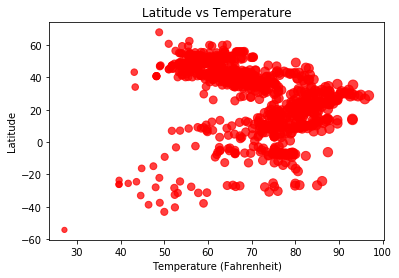

In [90]:
# Temperature (F) vs. Latitude
temp = []
latitude = []
for x in response_list:
    temp.append(x['main']['temp'])
    latitude.append(x['coord']['lat'])
plt.scatter(temp, latitude, facecolor='red', s=temp, alpha=0.75)
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Latitude')
plt.title('Latitude vs Temperature')
plt.show()

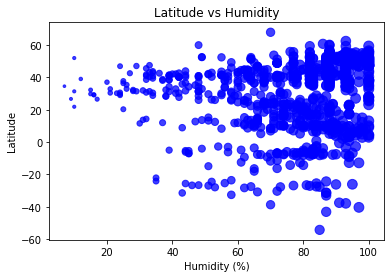

In [91]:
# Humidity (%) vs. Latitude
humidity = []
latitude = []
for x in response_list:
    humidity.append(x['main']['humidity'])
    latitude.append(x['coord']['lat'])
plt.scatter(humidity, latitude, facecolor='blue', s=humidity, alpha=0.75)
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Latitude vs Humidity')
plt.show()

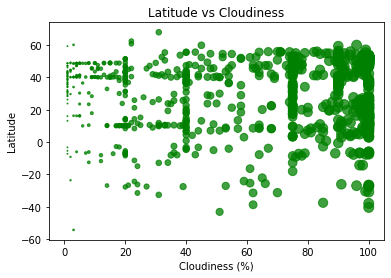

In [92]:
# Cloudiness (%) vs. Latitude

cloudiness = []
latitude = []
for x in response_list:
    cloudiness.append(x['clouds']['all'])
    latitude.append(x['coord']['lat'])   

plt.scatter(cloudiness, latitude, facecolor='green', s=cloudiness, alpha=0.75)
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Latitude vs Cloudiness')
plt.show()

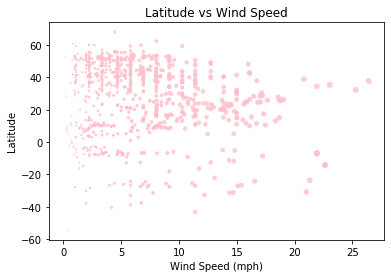

In [93]:
# Wind Speed (mph) vs. Latitude
wspeed = []
latitude = []
for x in response_list:
    wspeed.append(x['wind']['speed'])
    latitude.append(x['coord']['lat'])   

plt.scatter(wspeed, latitude, facecolor='pink', s=wspeed, alpha=0.75)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Latitude vs Wind Speed')
plt.show()

892
892
108
108


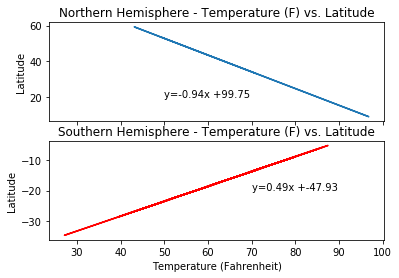

In [94]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
n_temp = []
s_temp = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_temp.append(x['main']['temp'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_temp.append(x['main']['temp'])
print(len(northern_latitude))
print(len(n_temp))        
print(len(southern_latitude))     
print(len(s_temp))   
 
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_temp, northern_latitude)
nregress = nslope * np.asarray(n_temp) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_temp, southern_latitude)
sregress = sslope * np.asarray(s_temp) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_temp, nregress)
ax1.annotate(nequation, (50, 20), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Temperature (F) vs. Latitude')

ax2.plot(s_temp, sregress, color = 'red')
ax2.annotate(sequation, (70, -20), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Temperature (Fahrenheit)')
ax2.set_title('Southern Hemisphere - Temperature (F) vs. Latitude')

plt.show()




892
892
108
108


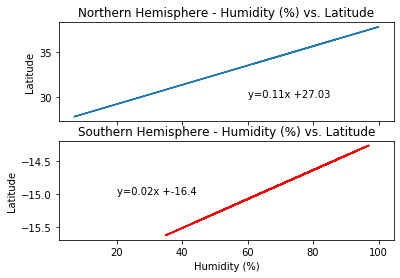

In [101]:
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude
n_hum = []
s_hum = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_hum.append(x['main']['humidity'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_hum.append(x['main']['humidity'])
print(len(northern_latitude))
print(len(n_hum))        
print(len(southern_latitude))     
print(len(s_hum))   
 
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_hum, northern_latitude)
nregress = nslope * np.asarray(n_hum) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_hum, southern_latitude)
sregress = sslope * np.asarray(s_hum) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_hum, nregress)
ax1.annotate(nequation, (60, 30), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Humidity (%) vs. Latitude')

ax2.plot(s_hum, sregress, color = 'red')
ax2.annotate(sequation, (20, -15), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Humidity (%)')
ax2.set_title('Southern Hemisphere - Humidity (%) vs. Latitude')

plt.show()


892
892
108
108


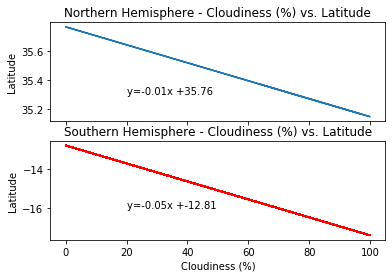

In [100]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
n_cloud = []
s_cloud = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_cloud.append(x['clouds']['all'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_cloud.append(x['clouds']['all'])
print(len(northern_latitude))
print(len(n_cloud))        
print(len(southern_latitude))     
print(len(s_cloud))   
 
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_cloud, northern_latitude)
nregress = nslope * np.asarray(n_cloud) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_cloud, southern_latitude)
sregress = sslope * np.asarray(s_cloud) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_cloud, nregress)
ax1.annotate(nequation, (20, 35.3), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Cloudiness (%) vs. Latitude')

ax2.plot(s_cloud, sregress, color = 'red')
ax2.annotate(sequation, (20, -16), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Cloudiness (%)')
ax2.set_title('Southern Hemisphere - Cloudiness (%) vs. Latitude')

plt.show()


892
892
108
108


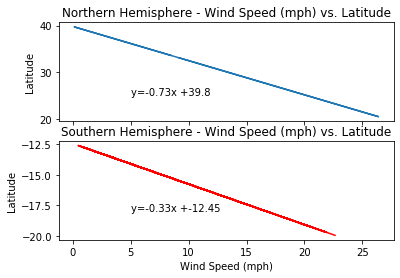

In [99]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
n_wspd = []
s_wspd = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_wspd.append(x['wind']['speed'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_wspd.append(x['wind']['speed'])
print(len(northern_latitude))
print(len(n_wspd))        
print(len(southern_latitude))     
print(len(s_wspd))   
 
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_wspd, northern_latitude)
nregress = nslope * np.asarray(n_wspd) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_wspd, southern_latitude)
sregress = sslope * np.asarray(s_wspd) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_wspd, nregress)
ax1.annotate(nequation, (5, 25), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')

ax2.plot(s_wspd, sregress, color = 'red')
ax2.annotate(sequation, (5, -18), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Wind Speed (mph)')
ax2.set_title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')

plt.show()
